In [108]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [109]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [110]:
! cp kaggle.json ~/.kaggle/

In [111]:
! chmod 600 ~/.kaggle/kaggle.json

In [112]:
! kaggle datasets download prachi13/customer-analytics

  0% 0.00/121k [00:00<?, ?B/s]
100% 121k/121k [00:00<00:00, 31.3MB/s]


In [113]:
! unzip /content/customer-analytics.zip

Archive:  /content/customer-analytics.zip
replace Train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Train.csv               


In [114]:
! rm /content/customer-analytics.zip

## Data Description

* ID: ID Number of Customers.

* Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.

* Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.

* Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
* Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
* Cost of the product: Cost of the Product in US Dollars.
* Prior purchases: The Number of Prior Purchase.
* Product importance: The company has categorized the product in the various parameter such as low, medium, high.
* Gender: Male and Female.
* Discount offered: Discount offered on that specific product.
* Weight in gms: It is the weight in grams.
* Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
from collections import Counter

In [116]:
df = pd.read_csv('/content/Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [117]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [118]:
df.shape

(10999, 12)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [120]:
# Categorical data
categorical = ['Warehouse_block','Mode_of_Shipment','Product_importance', 'Gender']

In [121]:
# Numerical data
numeric = ['Customer_care_calls','Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms','Reached.on.Time_Y.N']

In [122]:
# Cek Duplikaasi
df.duplicated().sum() 

0

In [123]:
# Cek null/not number values
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [124]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


Jika kita perhatikan berdasarkan data tersebut, Distribusi dari customer_care_calls, Customer_rating, Cost_of_the_Product, Prior_purchases terlihat memiliki distribusi yang normal karena mean dan median memiliki nilai yang tidak berbeda jauh. Semantara Prior_purchases dan Discount_offered akan berubah cukup drastis setelah melewati persentil 75%, maka kita dapat cek lebih lanjut untuk mengetahui apakah terdapat outlayer.




## Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

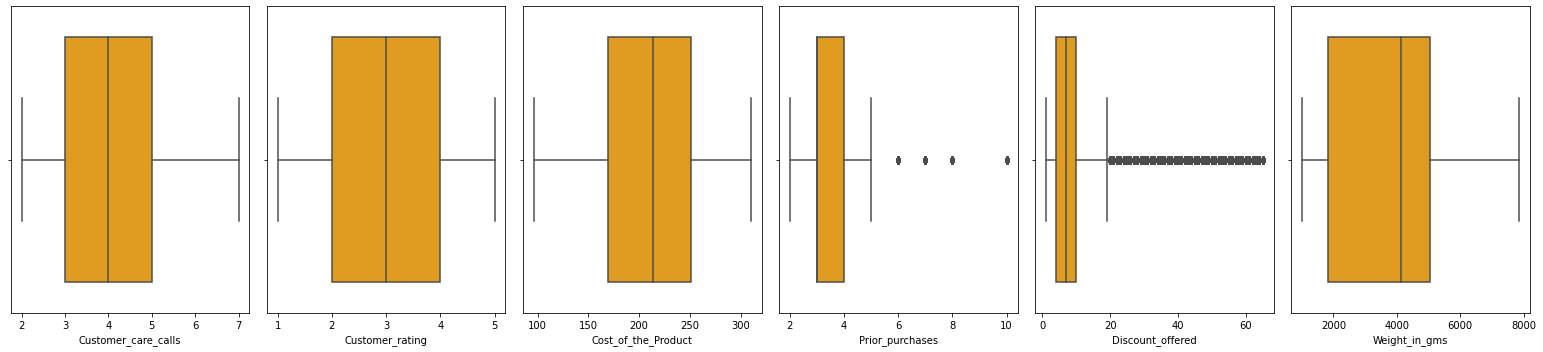

In [167]:
# Melihat outliyers untuk seluruh data bertipe numerical just in case ternyata terdapat outliyers  
# selain di kolom Prior_purchases dan Discount_offered
numericData= df[numeric]
plt.figure(figsize=(25,5))
for i,colour in zip(range(0, len(numericData.columns)),['blue', 'green', 'red', 'yellow','lightblue','gray']):
    plt.subplot(1,len(numericData.columns),i+1)
    sns.boxplot(numericData[numericData.columns[i]], color='orange')
    plt.tight_layout()

* Berdasarkan grafik boxplot tersebut, terdapat outliers pada sisi sebelah kanan pada kolom Prior_purchase dan Discount_offered yang menyebabkan distribusi yang tidak normal.
* Distribusi dari kolom Weight_in_gms mempunyai distribusi data yang tidak simetris yang ditandai dengan tidak ditengahnya garis median pada interquartile range (IQR)
* 'Customer_care_calls','Customer_rating','Cost_of_the_Product' memiliki kecendrungan distribusi data yang normal yang ditandai dengan garis median yang berada di tengah range IQR

Untuk kasus exploratory data analisis ini, outliers pada kolom Discount_offered tetap dapat digunakan tanpa adanya *treatment* untuk data dengan asumsi bahwa memang ada beberapa barang yang akan memiliki diskon yang tinggi. Akan tetapi ketika tujuan data akan digunakan untuk melakukan prediksi yang membutuhkan training, outliers pada tiap kolom akan lebih baik diperbaiki karena dapat mempengaruhi model

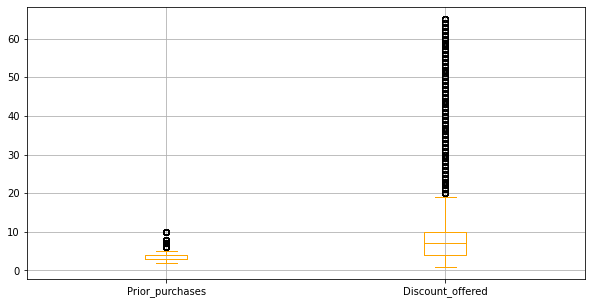

In [126]:
# Melihat outlayers pada kolom Prior_purchases dan Discount_offered
plt.figure(figsize=(10,5))
boxplot = df.boxplot(column=['Prior_purchases','Discount_offered'],color='orange')

Jika dilihat dari boxplot tersebut, Prior_purchases dan Discount_offered memiliki beberapa outliyer pada upper bound yang dapat kita proses dengan asumsi terjadi kesalahan pada input data. 

In [127]:
# # We handle outlier with replace the value with upper_bound or lower_bound 
# for col in ['Prior_purchases','Discount_offered']:
#     # Initiate Q1
#     Q1 = df[col].quantile(0.25)
#     # Initiate Q3
#     Q3 = df[col].quantile(0.75)
#     # Initiate IQR
#     IQR = Q3 - Q1
    
#     upper_bound = Q3 + (IQR * 1.5)
#     print(len(list(df[df[col] > upper_bound].index)))

Kita lihat bahwa outliyers dapa Prior_purchases dan Discount_offered hampir sekitar 15%-30% dari data, sehingga kita tidak dapat menghapus data tersebut melainkan dapat menggantinya dengan upper bound dari data 

In [128]:
# # We handle outlier with replace the value with upper_bound or lower_bound 
# for col in ['Prior_purchases','Discount_offered']:
#     # Initiate Q1
#     Q1 = df[col].quantile(0.25)
#     # Initiate Q3
#     Q3 = df[col].quantile(0.75)
#     # Initiate IQR
#     IQR = Q3 - Q1
#     # Initiate upper_bound
#     upper_bound = Q3 + (IQR * 1.5)
#     # Filtering outlier & replace with upper_bound
#     # df[col].mask(df[col]>=upper_bound,upper_bound,inplace=True)
#     df[col] = np.where(df[col] >= upper_bound,upper_bound, df[col])
#     print(len(list(df[df[col] > upper_bound].index)))

In [169]:
# Melihat outlayers pada kolom Prior_purchases dan Discount_offered
# plt.figure(figsize=(10,5))
# boxplot = df.boxplot(column=['Prior_purchases','Discount_offered'],color='orange')

Outliyers berhasil dihilangkan

## Melakukan Plot untuk tiap kolom categorical dan numerical

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

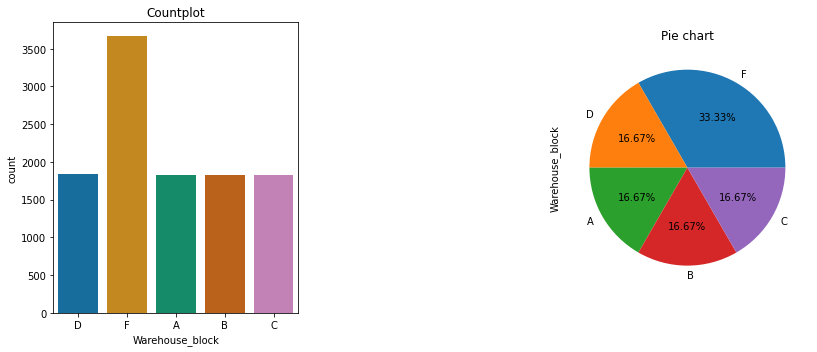

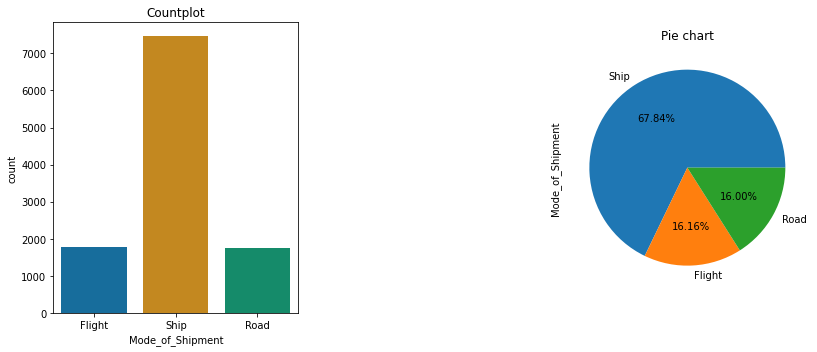

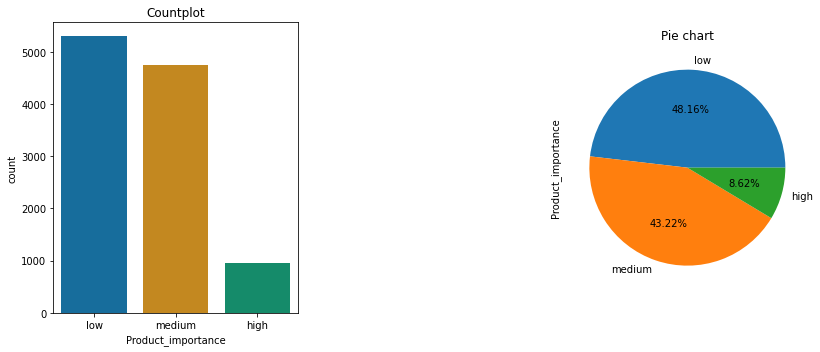

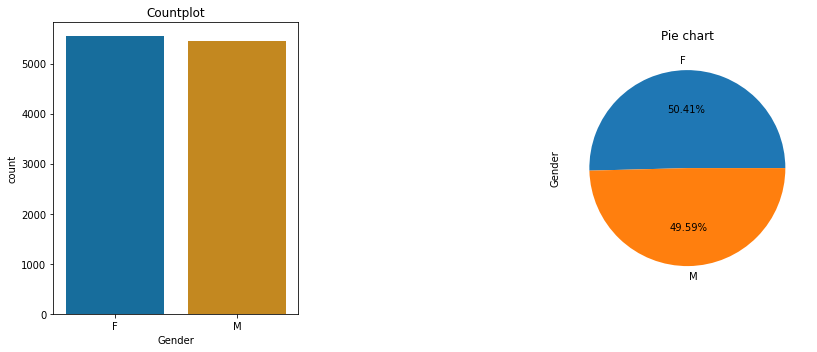

In [155]:
# Copy dataset
df_eda = df.copy()
# Plot categorical columns
for col in categorical:
    plt.figure(figsize=(15, 5))
    
    plt.subplot(141);
    sns.countplot(df_eda[col], palette = 'colorblind', orient='v');
    plt.title('Countplot')
    plt.tight_layout();
    
    plt.subplot(143);
    df_eda[col].value_counts().plot.pie(autopct='%1.2f%%');
    plt.title('Pie chart')  

Dari data tersebut, kita dapat mengerti beberapa informasi, yaitu:


*   Warehouse_block F merupakan warehouse yang mendominasi dari datangnya barang 
*   Mode_of_Shipment melewati ship/kapal merupaka mode transformasi yang paling sering digunakan
*   Product_importance yang dikirimkan biasanya memiliki prioritas rendah dan medium
*   Gender pada data kurang lebih memiliki perbandingan yang sama 



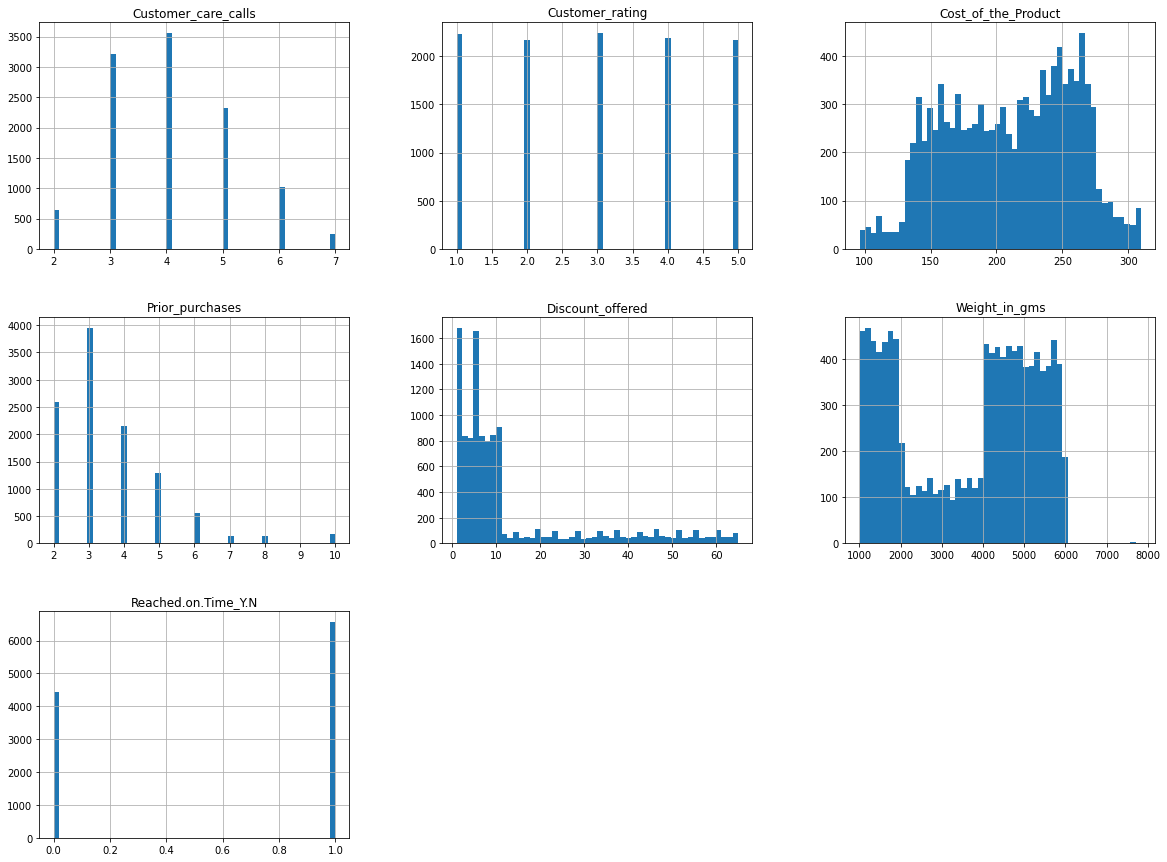

In [132]:
# Plot a histogram for each numerical attribute
df[numeric].hist(bins=50, figsize=(20,15))
plt.show()

*   Banyaknya items yang sampai tepat waktu lebih banyak daripada yang terlambat 
*   Discount_offered dan Weight_in_gms menunjukkan distribusi yang tidak normal/ skewed distribution
*   Customer rating memiliki sebaran yang seimbang
*   Prior_purchases yang pernah dilakukan sebelumnya paling banyak untuk setiap orang adalah 3 

## Melihat relasi antar data

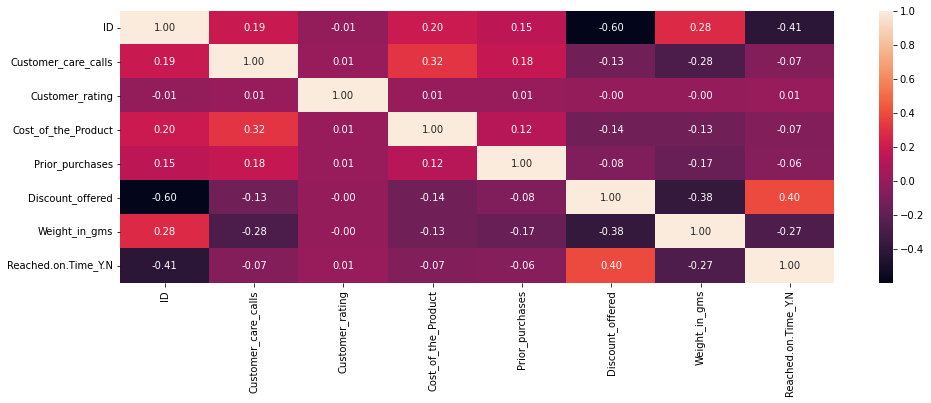

In [133]:
colom = ['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N']

plt.figure(figsize = (16,5))
sns.heatmap(df.corr(), annot = True, fmt = ".2f")
plt.show()

**Korelasi yang tinggi dari data :** <br>
*   Reached.on.time -- Discount_offered (0.41)<br>
*   Reached.on.time -- Weight_in_gms (-0.27)<br>
*   Cost_of_the_Product -- Customer_care_calls (0.32)<br>
*   Weight_in_gms -- Dscount_offered (-0.38)<br>




## Melakukan beberapa exploratory data berdasarkan heatmap

### Relasi antara Customer Care Calls - Cost of The Product

In [168]:
fig = px.density_heatmap(df, x="Customer_care_calls", y="Cost_of_the_Product", nbinsx=10, nbinsy=10, color_continuous_scale="Viridis")

fig.show()

Berdasarkan grafik headmap tersebut, dapat kita ketahui beberapa informasi:
* Ketika harga dari suatu barang 150-250, kecenderungan panggilan untuk customer service akan sebanyak 3-4 kali.
* Ketika harga dari suatu barang 250-300, maka kecenderungan panggilan untuk customer service akan berkisar 4-7 kali panggilan.

Maka dari informasi tersebut, dapat kita ambil trend bahwa semakin tinggi harga barang, maka semakin sering pula customer akan melakukan panggilan customer service


### Relation antara Reached on time dengan discount_offered

In [176]:
data1=df[df["Reached.on.Time_Y.N"]==1].sort_values("Discount_offered",ascending=True)
a=list(Counter(data1["Discount_offered"]).keys())
b=list(Counter(data1["Discount_offered"]).values())

data2=df[df["Reached.on.Time_Y.N"]==0].sort_values("Discount_offered",ascending=True)
c=list(Counter(data2["Discount_offered"]).keys())
d=list(Counter(data2["Discount_offered"]).values())

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=a,
    y=b,
    name = 'not reached on time (1)',
))

fig.add_trace(go.Scatter(
    x=c,
    y=d,
    name='reached on time (0)',
))

fig.update_layout(
    xaxis_title="Discount",
    yaxis_title="Frequensi Produk",
)
fig.show()

Berdasarkan grafik scatter tersebut, dapat kita lihat bahwa ketika sebuah barang memmiliki diskon lebih dari 10%, maka barang tersebut akan datang terlambat. Sedangkan barang yang memiliki diskon kurang dari 10% akan memiliki kemungkinan lebih tinggi untuk datang tepat waktu.

### Relasi antara Weight of The Product in Grams - Discount Offered

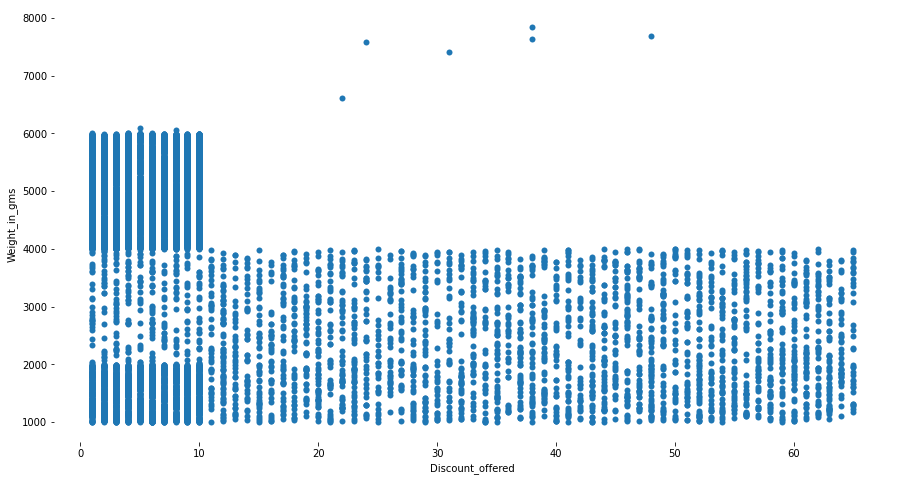

In [135]:
f, ax = plt.subplots(figsize=(15, 8))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="Discount_offered", y="Weight_in_gms",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=df_eda, ax=ax)

Berdasarkan tabel scatter plot antara berat produk dan diskon, dapat kita lihat terdapat trend bahwa kebanyakan barang dengan berbagai berat akan memiliki diskon kurang dari 10%. Kemudian, produk yang memiliki berat **lebih dari**  4 kg akan memiliki diskon yang tidak lebih dari 10%.  

# Analisis terhadap Keterlambatan Barang terhadap fitur data 

## Melihat sebaran target dataset (Reached.on.Time_Y.N) yang akan kita bandingkan 

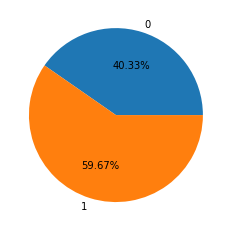

In [130]:
# Validasi data target
delay = pd.DataFrame(df_eda.groupby(['Reached.on.Time_Y.N'])['ID'].count()/len(df_eda)).reset_index()
plt.pie(delay['ID'],labels=delay['Reached.on.Time_Y.N'],autopct='%.2f%%');

Dapat kita lihat bahwa data yang akan kita bandingkan terlihat tersebar/memiliki frekuensi yang cukup merata, sehingga dapat kita jadikan data target yang dapat kita bandingkan

### Different on Arrival Time Ratio Based on Warehouse Block

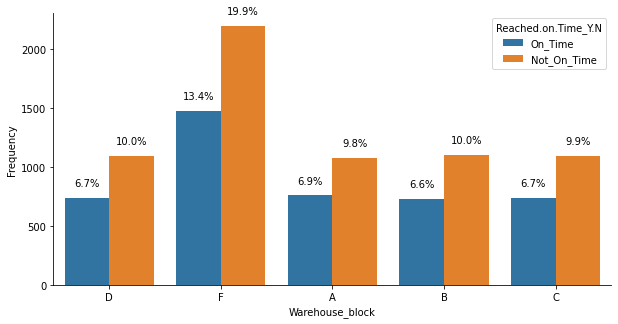

In [166]:
data_ex = df.copy()

# converting
data_ex['Reached.on.Time_Y.N'] = data_ex['Reached.on.Time_Y.N'].astype('category')
data_ex['Reached.on.Time_Y.N'].replace(1,'Not_On_Time', inplace=True)
data_ex['Reached.on.Time_Y.N'].replace(0,'On_Time', inplace=True)

plt.figure(figsize=(10,5))

total = float(len(data_ex)) 

ax = sns.countplot(x="Warehouse_block", data=data_ex, hue='Reached.on.Time_Y.N');
sns.despine(top=True, right=True, left=False, bottom=False);

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{0:.1%}'.format(height/total),
            ha="center", fontsize=10)
ax.set_ylabel('Frequency');

Berdasarkan diagram tersebut, dapat kita lihat bahwa Gudang F akan memiliki jumlah keterlambatan pengiriman paling tinggi, yaitu sebesar 19%. Akan tetapi, bila kita hitung menggunakan rasio jumlah frequnsi barang yang dikirim dari masing-masing block gudang, maka kita akan menemukan bahwa tidak ada perbedaan yang signifikan antara keterlambatan pengiriman dengan masing-masing block gudang. 

Rasio keterlambatan antar gudang (Semakin tinggi semakin mudah untuk terlambat):
* ratio A: 1.42
* ratio B: 1.52
* ratio C: 1.47
* ratio D: 1.49
* ratio F: 1.48

Untuk melihat warehouse mana yang menyimpan barang paling berat

In [172]:
px.histogram(data_frame = df, x = 'Weight_in_gms', nbins = 100, color = 'Warehouse_block',
             marginal = 'box', template = 'plotly_dark')

Dari grafik kita dapatkan bahwa gudang F menyimpan benda berat paling banyak

### Different on Arrival Time Ratio Based on Mode of Shipment

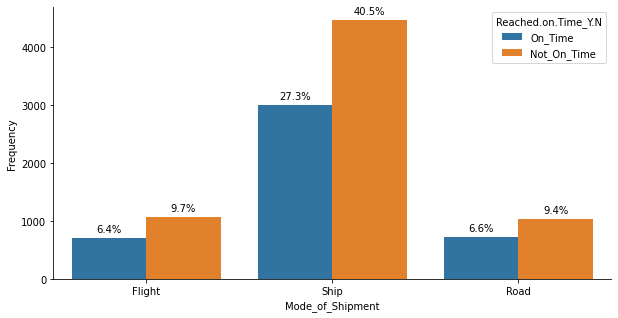

In [165]:
plt.figure(figsize=(10,5))

ax = sns.countplot(x="Mode_of_Shipment", data=data_ex, hue='Reached.on.Time_Y.N');
sns.despine(top=True, right=True, left=False, bottom=False);

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{0:.1%}'.format(height/total),
            ha="center", fontsize=10)
    
ax.set_ylabel('Frequency');

Berdasarkan diagram data tentang pengaruh keterlambatan berdasarkan mode pengiriman, terlihat bahwa mode pengiriman dengan kapal akan memberikan keterlambatan pengiriman yang lebih besar daripada mode transportasi lainnya. Akan tetapi ketika kita lihat berdasarkan frekuensi rasio pengiriman, terlihat bahwa tidak akan ada perbedaan yang signifikan antara keterlambatan barang dengan mede transportasi pengiriman.

Rasio mode transportasi dengan keterlambatan (Semakin tinggi semakin tidak tepat waktu)
* ratio Flight: 1.52
* ratio Ship: 1.48
* ratio Road: 1.42

Kemudian, untuk melihat mode transportasi mana yang menampung paling banyak baran-barang berat 

In [173]:
px.histogram(data_frame = df, x = 'Weight_in_gms', nbins = 100, color = 'Mode_of_Shipment',
             marginal = 'box', template = 'plotly_dark')

Dapat kita ketahui bahwa pengiriman melalui mode transportasi kapal akan lebih sering membawa barang-barang yang berat

### Product Importance dengan Waktu Kedatangan

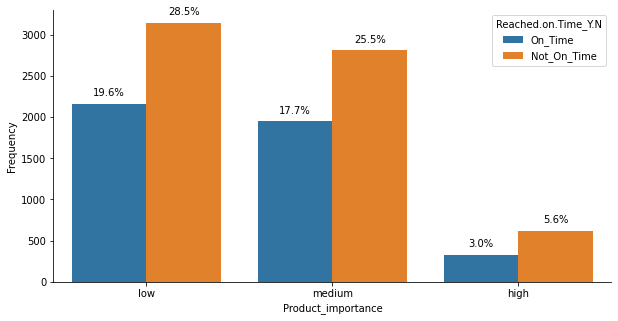

In [174]:
plt.figure(figsize=(10,5))

ax = sns.countplot(x="Product_importance", data=data_ex, hue='Reached.on.Time_Y.N');
sns.despine(top=True, right=True, left=False, bottom=False);

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{0:.1%}'.format(height/total),
            ha="center", fontsize=10)
    
# settings 
ax.set_ylabel('Frequency');


Jika dilihat dari rasio frequensi kepentingan dari suatu barang, item yang memiliki kepentingan yang tinggi akan memiliki rasio keterlambatan yang tinggi pula. 

Rasio keterlambatan (semakin tinggi semakin terlambat):
* ratio low: 1.45
* ratio medium: 1.44
* ratio high: 1.87



## Multivariate Analysis Menggunakan pair plot untuk mengetahui dan melakukan analisis fitur terhadap target/hue Reached.on.Time

<Figure size 360x360 with 0 Axes>

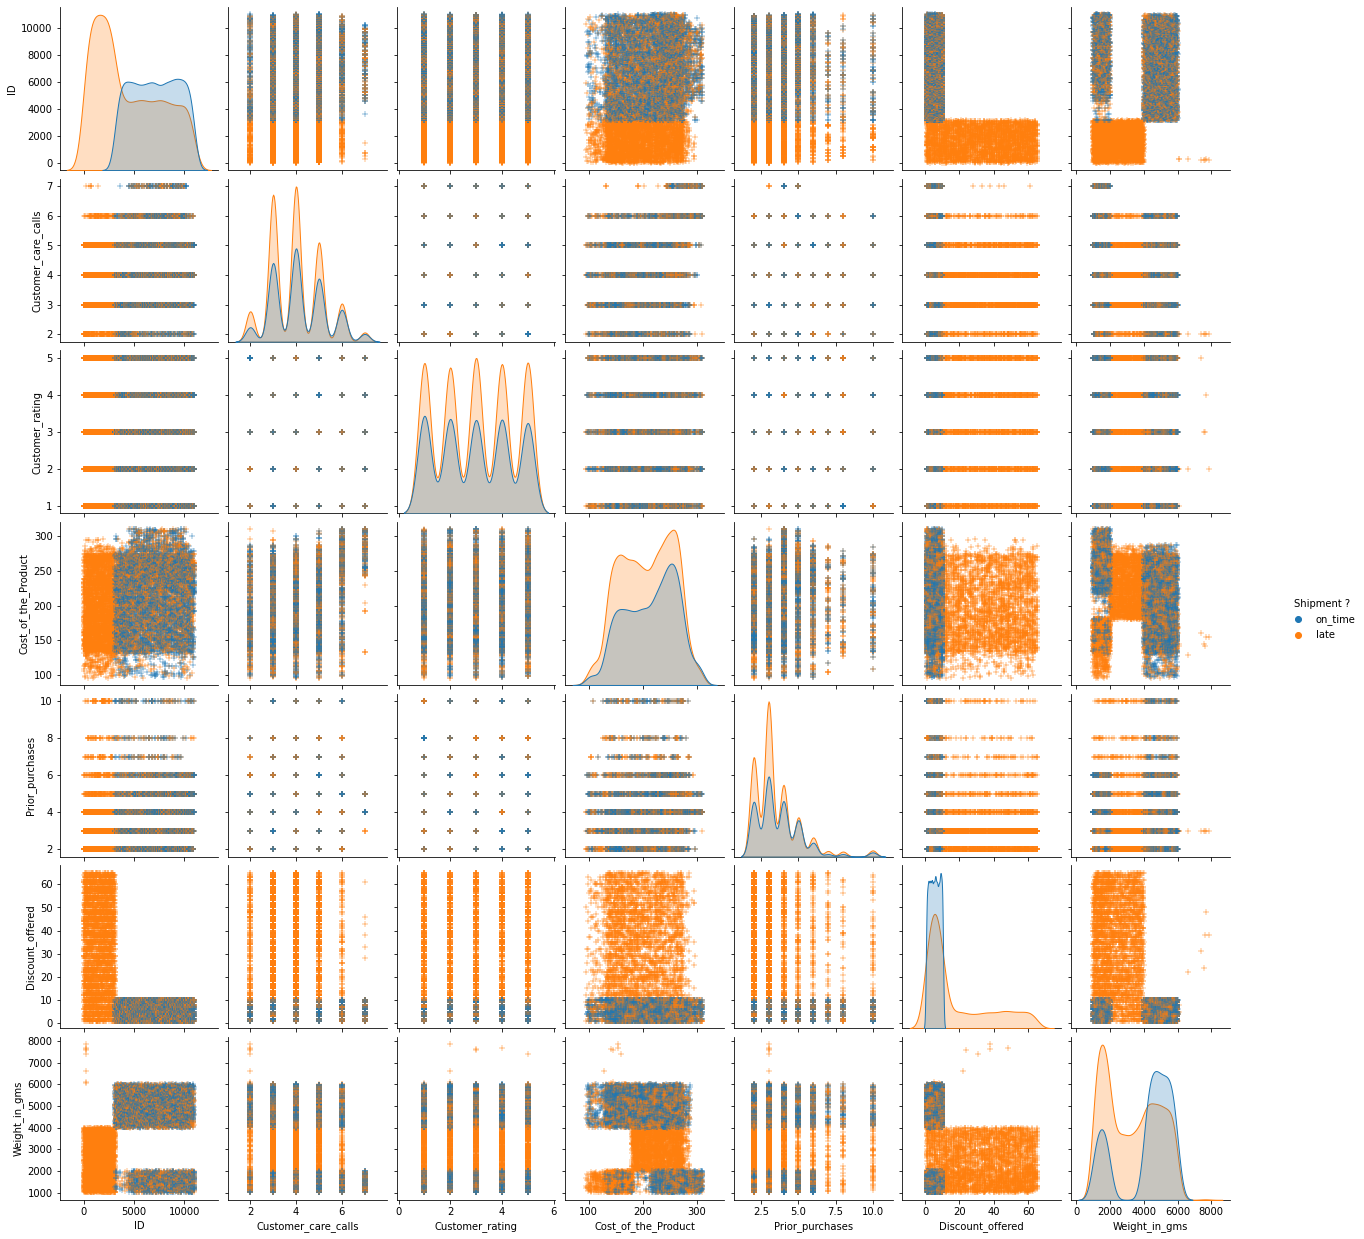

In [136]:
plt.figure(figsize=(5, 5));
p = sns.pairplot(df_eda, markers = '+', diag_kind = 'kde', hue = 'Reached.on.Time_Y.N');
# title
new_title = 'Shipment ?'
p._legend.set_title(new_title);

# replace labels
new_labels = ['on_time', 'late']
for t, l in zip(p._legend.texts, new_labels): t.set_text(l);

**Dari pair plot yang digunakan informasi berkaitan dengan keterlambatan:**



*   Berdasarkan relasi trend antara Weight_in_gms dan Discount_offered, barang yang dikirim akan cenderung tepat waktu ketika terdapat diskon kurang dari 10% dan berat barang ada di antara 1-2 kg dan 4-6 kg. 

*   Item yang memiliki harga lebih dari 300 dollar cenderung untuk dikirimkan tepat waktu.






## Kesimpulan

Berdasarkan informasi yang telah diperoleh, untuk mendapatkan ketepatan waktu pengiriman barang elektronik yang akan dikirim maka kita dapat menggunakan:

* Gudang bagian A akan memberikan pengiriman yang relatif lebih tepat waktu jika dibandingkan bagian gudang lainnya dengan jumlah tempat penyimpanan yang standar. Akan tetapi gudang A cenderung hanya dapat menyimpan dalam jumlah yang sedikit dari setiap range berat barang.  
* Mode transportasi untuk pengiriman barang melalui jalur darat akan memilki pengiriman yang lebih cepat jika dibandingkan dengan mode pengiriman kapal dan pesawat. Akan tetapi Mode transportasi darat cenderung jarang digunakan karena keterbatasan frekuensi jumlah barang yang dapat dikirim.
 

Trend yang ditemukan dari eksplorasi data:
* Produk yang datang tepat waktu cenderung akan memiliki diskon yang terendah dan cenderung akan memilki berat yang terendaht atau tertinggi.
* Kepentingan dari suatu produk/*product importance* yang tinggi akan cenderung terlambat dalam pengirimannya. 
* Jika dilihat dari sudut pandang rasio frekuensi, rasio dari masing-masing gudang penyimpanan dan rasio dari masing-masing mode transportasi tidak memberikan pengaruh yang besar terhadap ketepatan pengiriman.

Future Work :
* Analisis dapat dikembangkan lebih lanjut dengan cara menggabungkan seluruh faktor menjadi satu dan divisualisasikan untuk benar-benar menemukan faktor apa yang mempengaruhi keterlambatan dari pengiriman barang. 
* Eksplorasi data juga dapat dilakukan lebih jauh untuk melihat bagaimana efek dari mode transportasi, berat barang, kepentingan dari suatu barang, dan faktor lain untuk melihat kecenderungan harga yang ditimbulkan.

 
